In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv("../data/coronavirus/coronavirus0410.csv", index_col="Country,Other")
data_df.head()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,"31,802,772",NaN,"574,840",NaN,"24,346,766",NaN,"6,881,166","9,078","95,647","1,729","416,789,330","1,253,501","332,500,290",2021-04-10
Brazil,"13,375,414",NaN,"348,934",NaN,"11,791,885",NaN,"1,234,595","8,318","62,582","1,633","28,600,000","133,817","213,724,704",2021-04-10
India,"13,205,926","+3,143","168,467",NaN,"11,990,859","+2,919","1,046,600","8,944","9,498",121,"255,214,803","183,547","1,390,456,911",2021-04-10
France,"4,980,501",NaN,"98,395",NaN,"303,639",NaN,"4,578,467","5,729","76,172","1,505","68,007,540","1,040,108","65,385,105",2021-04-10
Russia,"4,623,984",NaN,"102,247",NaN,"4,248,700",NaN,"273,037","2,300","31,675",700,"123,000,000","842,565","145,982,840",2021-04-10


In [3]:
data_df.shape

(221, 14)

In [4]:
data_df.dtypes

TotalCases           object
NewCases             object
TotalDeaths          object
NewDeaths           float64
TotalRecovered       object
NewRecovered         object
ActiveCases          object
Serious,Critical     object
Tot Cases/1M pop     object
Deaths/1M pop        object
TotalTests           object
Tests/1M pop         object
Population           object
Date                 object
dtype: object

In [5]:
obj_col = set(data_df.select_dtypes(include=['object']).columns)-set(["Date"])
def convert(df):
    if df.name in obj_col:
        df = pd.to_numeric(df.str.replace(",", ""), errors='coerce')
    return df
data_df=data_df.apply(convert)

In [6]:
data_df.dtypes

TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
Population          float64
Date                 object
dtype: object

In [7]:
data_df.isna().sum()

TotalCases            0
NewCases            208
TotalDeaths          15
NewDeaths           212
TotalRecovered        2
NewRecovered        208
ActiveCases           2
Serious,Critical     76
Tot Cases/1M pop      2
Deaths/1M pop        17
TotalTests           12
Tests/1M pop         12
Population            2
Date                  0
dtype: int64

In [8]:
def missing_ratio(df):
    return df.isna().sum()/len(df)

missing_ratio = data_df.loc[:,data_df.columns != "Date"].apply(missing_ratio)#.apply('{:.3%}'.format)
sum=  data_df.loc[:,data_df.columns != "Date"].agg('sum').apply('{:3}'.format)
info_df = pd.DataFrame([missing_ratio, sum], index=["Missing Ratio", "Sum"])
info_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
Missing Ratio,0,0.941176,0.0678733,0.959276,0.00904977,0.941176,0.00904977,0.343891,0.00904977,0.0769231,0.0542986,0.0542986,0.00904977
Sum,135315183.0,25314.0,2928782.0,1098.0,108859547.0,25624.0,21365034.0,102124.0,6278379.0,103330.29999999999,1976710135.0,115559796.0,7817558576.0


In [9]:
pd.options.display.float_format = '{:.2f}'.format
data_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,31802772,nan,574840.00,nan,24346766.00,nan,6881166.00,9078.00,95647.00,1729.00,416789330.00,1253501.00,332500290.00,2021-04-10
Brazil,13375414,nan,348934.00,nan,11791885.00,nan,1234595.00,8318.00,62582.00,1633.00,28600000.00,133817.00,213724704.00,2021-04-10
India,13205926,3143.00,168467.00,nan,11990859.00,2919.00,1046600.00,8944.00,9498.00,121.00,255214803.00,183547.00,1390456911.00,2021-04-10
France,4980501,nan,98395.00,nan,303639.00,nan,4578467.00,5729.00,76172.00,1505.00,68007540.00,1040108.00,65385105.00,2021-04-10
Russia,4623984,nan,102247.00,nan,4248700.00,nan,273037.00,2300.00,31675.00,700.00,123000000.00,842565.00,145982840.00,2021-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marshall Islands,4,nan,nan,nan,4.00,nan,0.00,nan,67.00,nan,nan,nan,59498.00,2021-04-10
Samoa,3,nan,nan,nan,2.00,nan,1.00,nan,15.00,nan,nan,nan,199431.00,2021-04-10
Vanuatu,3,nan,nan,nan,1.00,nan,2.00,nan,10.00,nan,470.00,1503.00,312643.00,2021-04-10


In [10]:
# data_df.fillna(data_df.mean(), inplace=True)
data_df.sort_values(by="TotalCases", ascending=False)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,31802772,nan,574840.00,nan,24346766.00,nan,6881166.00,9078.00,95647.00,1729.00,416789330.00,1253501.00,332500290.00,2021-04-10
Brazil,13375414,nan,348934.00,nan,11791885.00,nan,1234595.00,8318.00,62582.00,1633.00,28600000.00,133817.00,213724704.00,2021-04-10
India,13205926,3143.00,168467.00,nan,11990859.00,2919.00,1046600.00,8944.00,9498.00,121.00,255214803.00,183547.00,1390456911.00,2021-04-10
France,4980501,nan,98395.00,nan,303639.00,nan,4578467.00,5729.00,76172.00,1505.00,68007540.00,1040108.00,65385105.00,2021-04-10
Russia,4623984,nan,102247.00,nan,4248700.00,nan,273037.00,2300.00,31675.00,700.00,123000000.00,842565.00,145982840.00,2021-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS Zaandam,9,nan,2.00,nan,7.00,nan,0.00,nan,nan,nan,nan,nan,nan,2021-04-10
Marshall Islands,4,nan,nan,nan,4.00,nan,0.00,nan,67.00,nan,nan,nan,59498.00,2021-04-10
Samoa,3,nan,nan,nan,2.00,nan,1.00,nan,15.00,nan,nan,nan,199431.00,2021-04-10


In [11]:
# # data_df["TotalCases"].plot(kind='pie')
# threshold = 2504206
# part = data_df[data_df["TotalCases"] >=threshold]["TotalCases"]
# other = pd.Series({"Other":data_df[data_df["TotalCases"] <threshold]["TotalCases"].sum()})
# total=pd.concat([part, other])
# ax=total.plot.pie(autopct='%1.1f%%', figsize=(25, 10), labels=None, legend='best')
# plt.title("Tỉ lệ số ca mắc bệnh trên toàn thế giới theo các nước")
# plt.show()
# # ax.text(x=total.index, y= total.values, s=total)


In [12]:
data_df["TotalCases"]/data_df["Population"]*10**7

Country,Other
USA                956473.51
Brazil             625824.43
India               94975.44
France             761717.98
Russia             316748.46
                      ...   
Marshall Islands      672.29
Samoa                 150.43
Vanuatu                95.96
Micronesia             86.24
China                 628.07
Length: 221, dtype: float64

In [13]:
# death=data_df.iloc[:15,1].sort_values(ascending=True)
# plt.figure(figsize=(12, 6))
# ax=sns.barplot(y=death.index, x = death.values, orient="h")
# ax.set_title("Tổng số người chết tại một số nước trên thế giới")
# # plt.title("Tổng số người chết tại một số nước trên thế giới")

Chọn các thuộc tính TotalCasess, TotalDeaths, TotalRecovered, ActiveCases, TotalTests, Population

In [14]:
df = data_df[["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases", "Serious,Critical", "TotalTests", "Population"]]
df.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotalTests,Population
count,221.00,206.00,219.00,219.00,145.00,209.00,219.00
mean,612285.90,14217.39,497075.56,97557.23,704.30,9457943.23,35696614.50
std,2569863.34,52972.91,2069764.98,570882.17,1594.07,38056091.75,140295518.67
min,1.00,1.00,1.00,0.00,1.00,470.00,803.00
25%,4329.00,93.25,3107.50,243.50,13.00,111994.00,644973.50
50%,37147.00,748.50,28161.00,3093.00,82.00,842015.00,6606892.00
75%,266677.00,5579.00,224323.00,26163.50,483.00,4153203.00,24362032.50
max,31802772.00,574840.00,24346766.00,6881166.00,9078.00,416789330.00,1439323776.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020687363A00>,
      dtype=object)

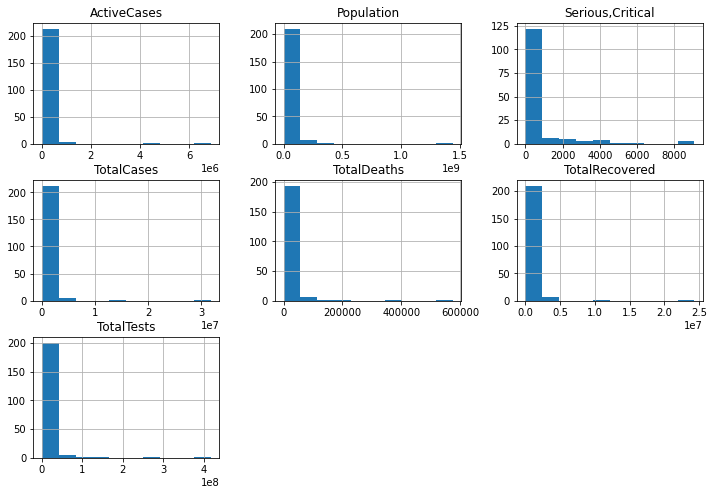

In [15]:
df.hist(figsize=(12, 8))

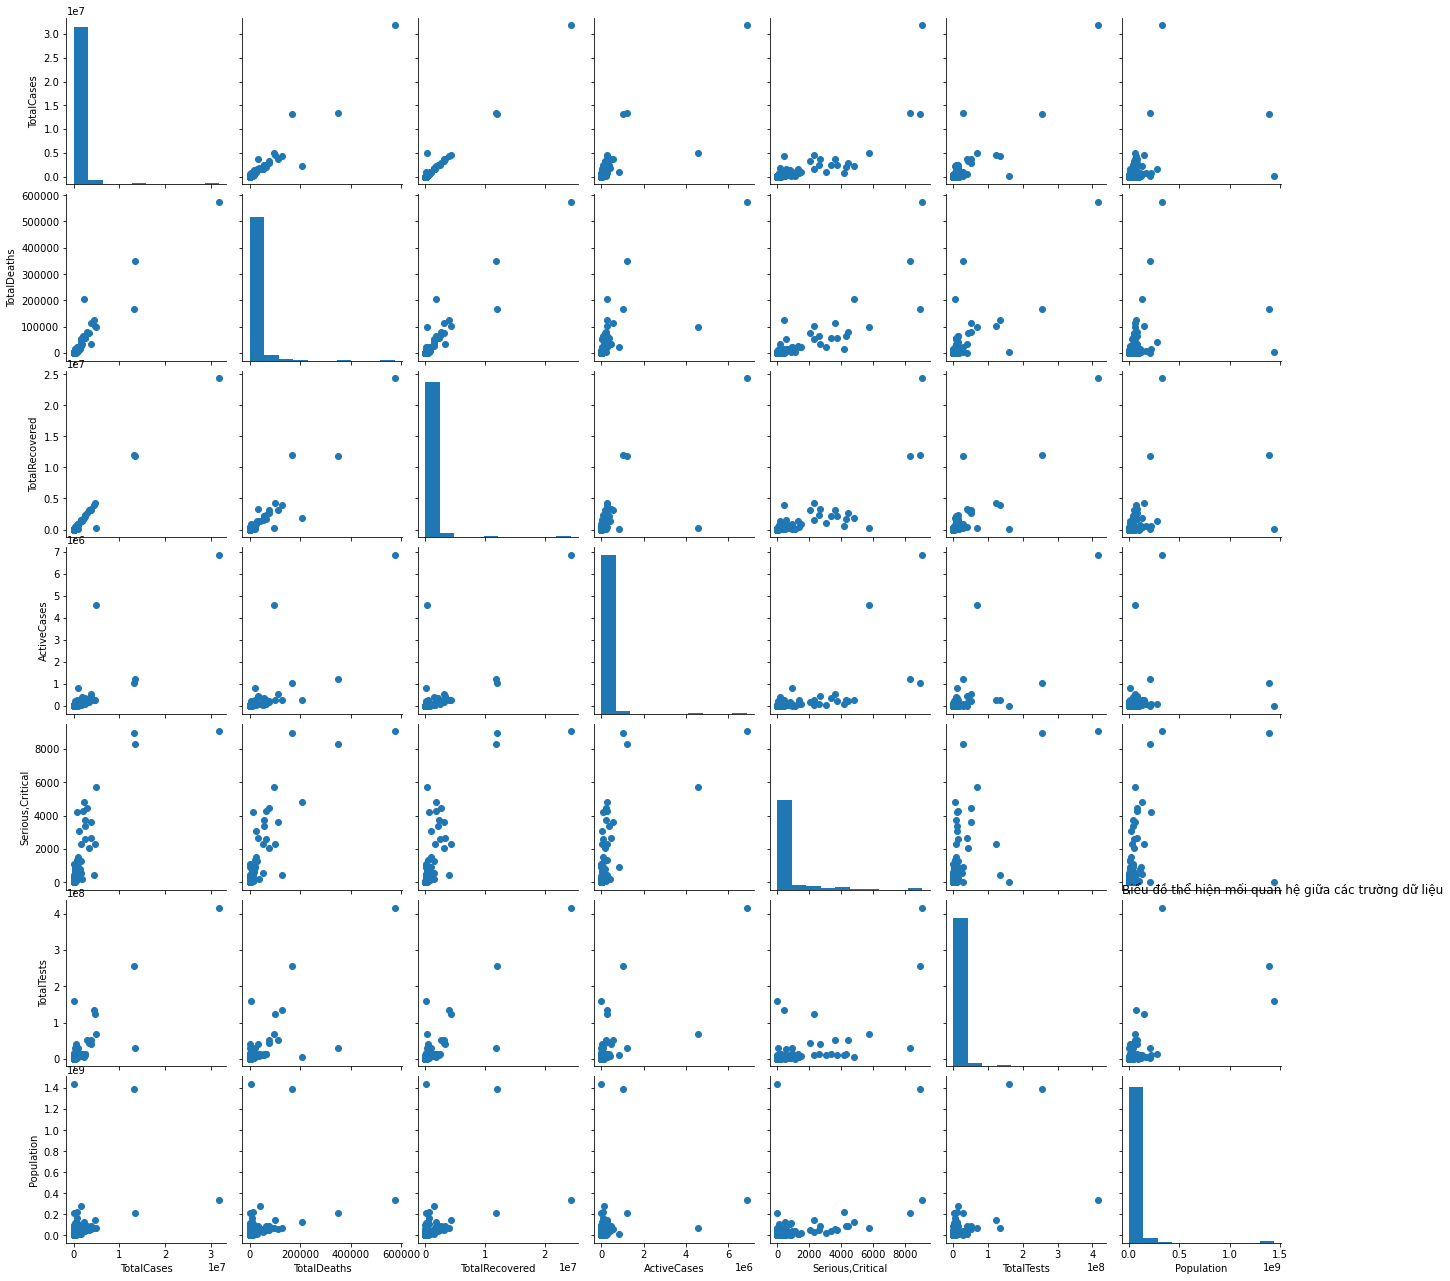

In [16]:
g = sns.PairGrid(df)
# g.map(plt.scatter)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.title("Biểu đồ thể hiện mối quan hệ giữa các trường dữ liệu", loc='left')
plt.show()

# Các trường dữ liệu

- Đễ dàng biểu diễn. ta chỉ chọn ra top 10 quốc gia, vùng lãnh thổ có tỉ lệ mắc bệnh lớn

## Trường dữ liệu TotalDeaths

In [17]:
def draw(df, top, col):
    data=df.sort_values(by=col, ascending=False)[:top]
    fig, axs =plt.subplots(1,2)
    fig.tight_layout()
    title_ = "Top " + str(top) + " of "+ col
    data[col].plot(kind='barh',figsize=(20, 6), title=title_, color='green', ax=axs[0])
    data[col].plot(kind='pie', autopct='%1.1f%%',figsize=(20, 6), labels=None, ax=axs[1], legend='auto')
    plt.show()
top=10

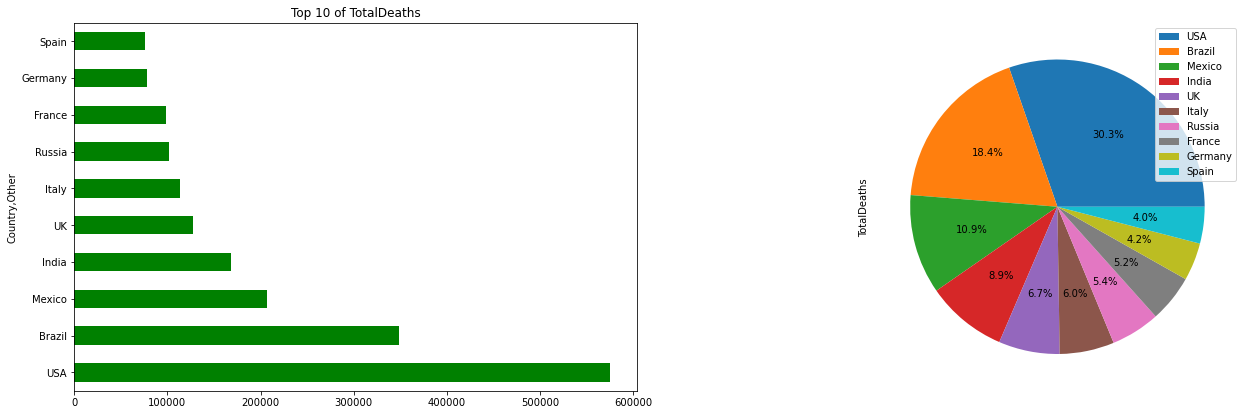

In [18]:
draw(df, top, "TotalDeaths")

## Trường dữ liệu TotalCases

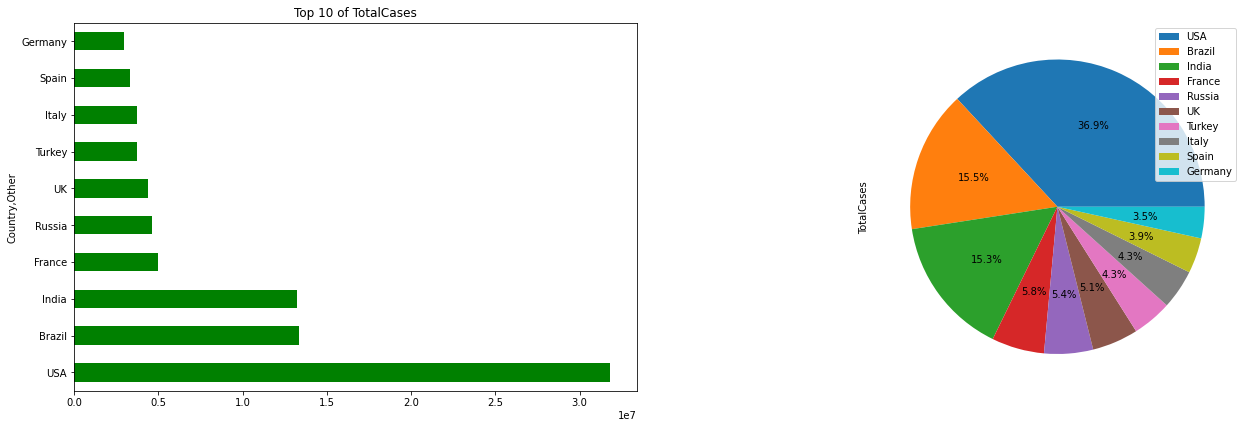

In [19]:
draw(df, top, "TotalCases")

## Trường dữ liệu TotalRecovered

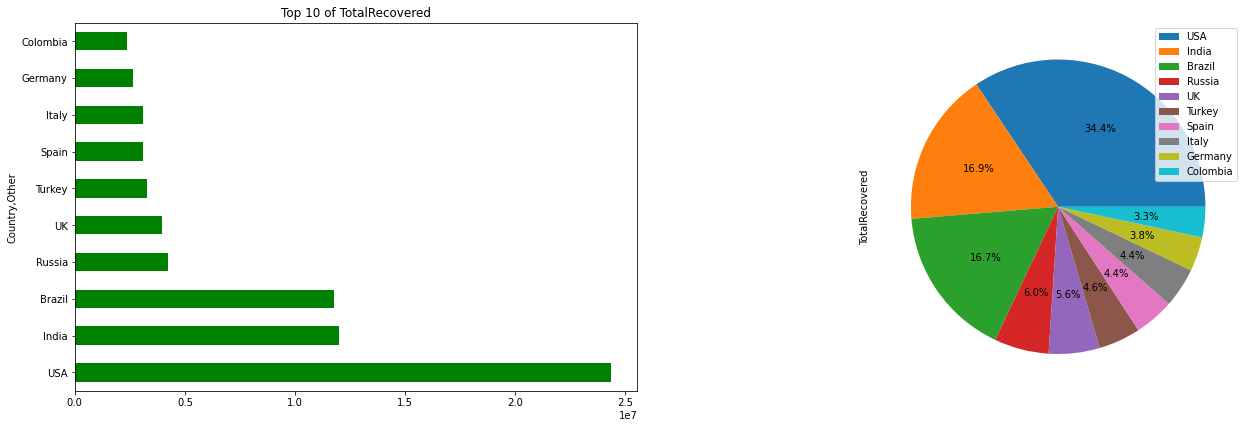

In [20]:
draw(df, top, "TotalRecovered")

## Trường dữ liệu ActiveCases

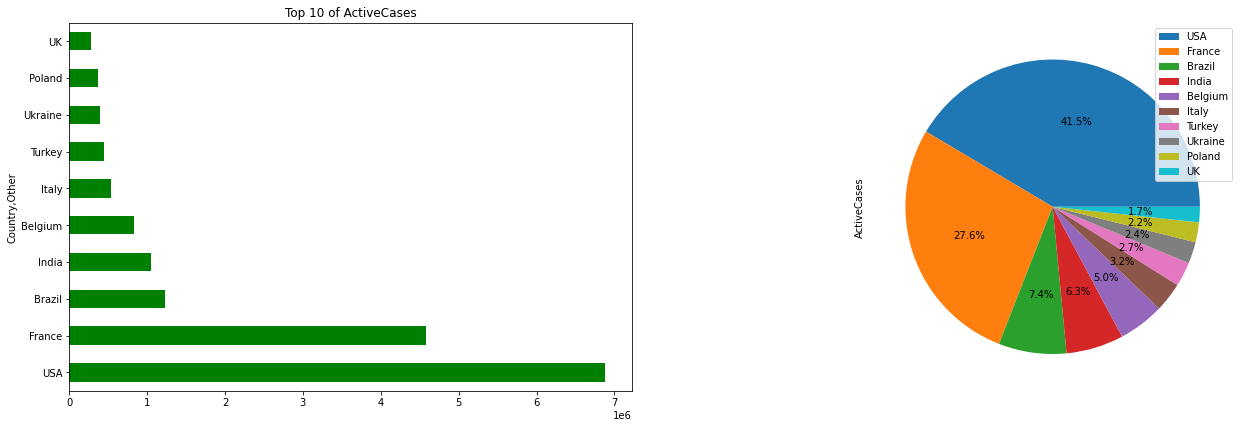

In [21]:
draw(df, top, "ActiveCases")

 ## Trường dữ liệu TotalTests

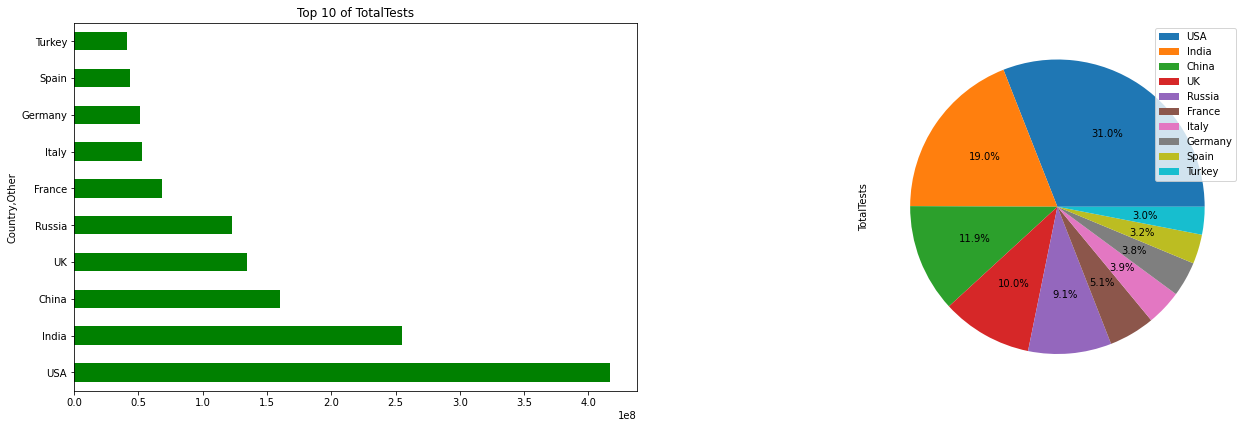

In [22]:
draw(df, top, "TotalTests")

## Trường dữ liệu Population

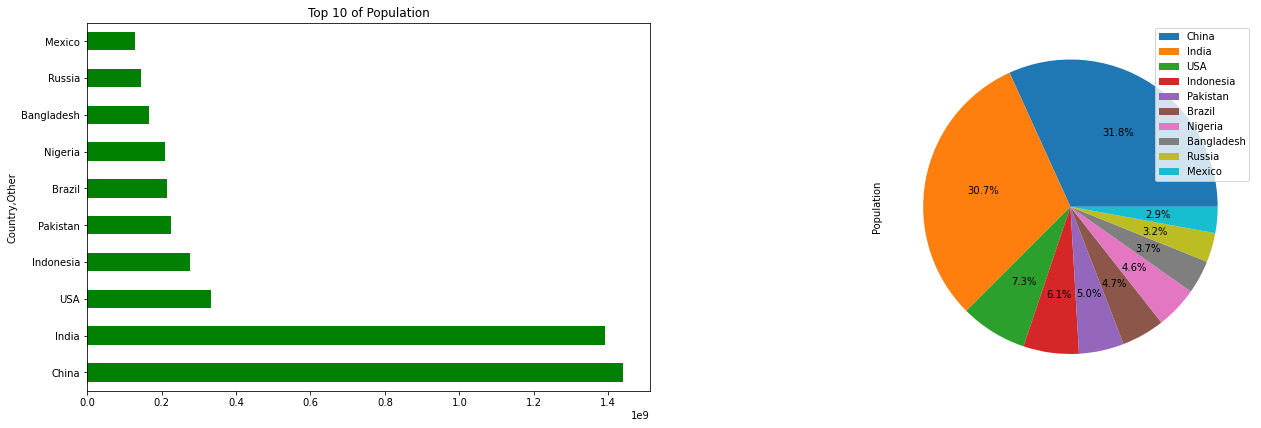

In [23]:
draw(df, top, "Population")

# Mối quan hệ giữa các trường dữ liệu

## Tỉ lệ TotalCases/TotalTests giữa các nước

In [24]:
df_10 = data_df.sort_values(by="TotalCases", ascending=False).head(10)
df_10

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,31802772,nan,574840.00,nan,24346766.00,nan,6881166.00,9078.00,95647.00,1729.00,416789330.00,1253501.00,332500290.00,2021-04-10
Brazil,13375414,nan,348934.00,nan,11791885.00,nan,1234595.00,8318.00,62582.00,1633.00,28600000.00,133817.00,213724704.00,2021-04-10
India,13205926,3143.00,168467.00,nan,11990859.00,2919.00,1046600.00,8944.00,9498.00,121.00,255214803.00,183547.00,1390456911.00,2021-04-10
France,4980501,nan,98395.00,nan,303639.00,nan,4578467.00,5729.00,76172.00,1505.00,68007540.00,1040108.00,65385105.00,2021-04-10
Russia,4623984,nan,102247.00,nan,4248700.00,nan,273037.00,2300.00,31675.00,700.00,123000000.00,842565.00,145982840.00,2021-04-10
UK,4365461,nan,127040.00,nan,3957317.00,nan,281104.00,421.00,64046.00,1864.00,134289127.00,1970169.00,68161226.00,2021-04-10
Turkey,3745657,nan,33454.00,nan,3268678.00,nan,443525.00,2658.00,44047.00,393.00,40994845.00,482077.00,85037969.00,2021-04-10
Italy,3736526,nan,113579.00,nan,3086586.00,nan,536361.00,3603.00,61870.00,1881.00,52480874.00,868989.00,60393047.00,2021-04-10
Spain,3347512,nan,76328.00,nan,3095922.00,nan,175262.00,2050.00,71576.00,1632.00,43458915.00,929229.00,46768779.00,2021-04-10


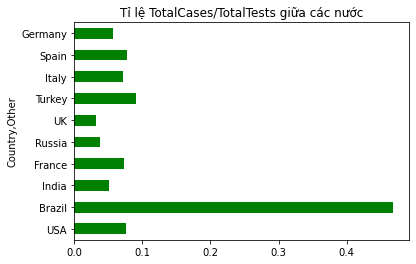

In [25]:
(df_10["TotalCases"]/df_10["TotalTests"]).plot(kind='barh', color='g', title = "Tỉ lệ TotalCases/TotalTests giữa các nước")

## Tỉ lệ TotalRecovered/TotalCases giữa các nước

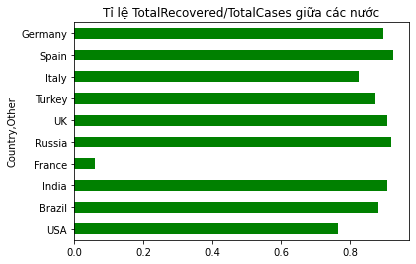

In [26]:
(df_10["TotalRecovered"]/df_10["TotalCases"]).plot(kind='barh', color='g', title = "Tỉ lệ TotalRecovered/TotalCases giữa các nước")

## Tổng TotalDeaths,TotalRecovered, ActiveCases là TotalCases

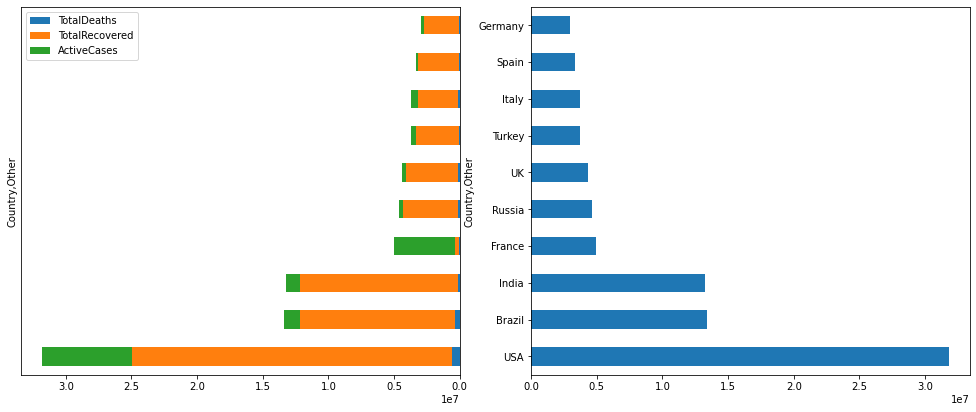

In [27]:
fig, axs = plt.subplots(1,2)
fig.tight_layout(w_pad=-0.25)
df_10[["TotalDeaths", "TotalRecovered", "ActiveCases"]].plot(kind='barh', stacked=True, figsize=(15, 6), ax=axs[0])
axs[0].set_yticks([])
axs[0].invert_xaxis()
df_10["TotalCases"].plot(kind='barh', stacked=True, figsize=(15, 6), ax=axs[1])

## Sắp xếp dữ liệu theo chiều giảm dần của NewCases để biết các nước có số ca nhiễm mới nhiều nhất tại thời điểm craw dữ liệu

In [28]:
newcases_10_df = data_df.sort_values(by = 'NewCases', ascending = False).head(10)
newcases_10_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
Pakistan,715968,5139.00,15329.00,100.00,627561.00,1772.00,73078.00,4204.00,3194.00,68.00,10688894.00,47679.00,224183472.00,2021-04-10
Mexico,2272064,5045.00,207020.00,874.00,1804913.00,2880.00,260131.00,4798.00,17481.00,1593.00,6241611.00,48021.00,129976073.00,2021-04-10
Belgium,917917,4860.00,23390.00,42.00,59165.00,263.00,835362.00,911.00,78936.00,2011.00,11620846.00,999336.00,11628563.00,2021-04-10
India,13205926,3143.00,168467.00,nan,11990859.00,2919.00,1046600.00,8944.00,9498.00,121.00,255214803.00,183547.00,1390456911.00,2021-04-10
Kazakhstan,266677,2734.00,3202.00,12.00,232835.00,1511.00,30640.00,221.00,14073.00,169.00,9103707.00,480417.00,18949587.00,2021-04-10
Bolivia,280649,1442.00,12428.00,16.00,230021.00,985.00,38200.00,71.00,23793.00,1054.00,976539.00,82789.00,11795501.00,2021-04-10
Thailand,31658,789.00,97.00,1.00,28161.00,33.00,3400.00,1.00,453.00,1.00,8124896.00,116177.00,69935286.00,2021-04-10
Honduras,194548,765.00,4766.00,51.00,75233.00,474.00,114549.00,512.00,19405.00,475.00,536963.00,53559.00,10025665.00,2021-04-10
Mongolia,14183,689.00,20.00,1.00,8875.00,353.00,5288.00,88.00,4273.00,6.00,2357529.00,710344.00,3318857.00,2021-04-10


In [29]:
newcases_10_df['NewCases']/newcases_10_df['Tests/1M pop']*10**2

Country,Other
Pakistan     10.78
Mexico       10.51
Belgium       0.49
India         1.71
Kazakhstan    0.57
Bolivia       1.74
Thailand      0.68
Honduras      1.43
Mongolia      0.10
S. Korea      0.43
dtype: float64

### Import thêm một số thư viện cần thiết

In [44]:
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

- Điền giá trị thiếu và tiến hành chuẩn hóa các cột

In [45]:
columns = newcases_10_df.columns
num_cols = columns[:-1]
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
colTransform = ColumnTransformer(transformers =[('numerical', imp_mean, num_cols)])
colNormalize=StandardScaler()
new_df = colTransform.fit_transform(newcases_10_df)
new_df = colNormalize.fit_transform(new_df)
new_df = pd.DataFrame(new_df, columns = ['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Population'])
new_df.shape

(10, 13)

- Sử dụng heatmap thể hiện mối quan hệ giữa từng đôi feature trong data

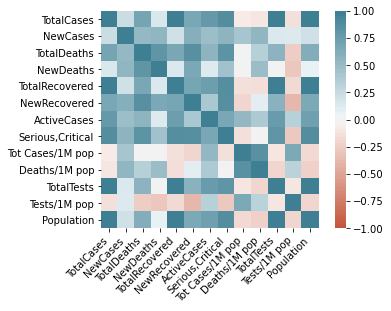

In [47]:
corr = new_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Sử dụng đường hồi quy để thể hiện gần nhất có thể mối quan hệ thực sự giữa hai biến

#### Mối quan hệ giữa New Cases và TotalCases

In [48]:
x = new_df['NewCases']
y = new_df['TotalCases']

# scipy.stats.pearsonr(x, y)
# scipy.stats.spearmanr(x, z)
scipy.stats.kendalltau(x, y) 

KendalltauResult(correlation=0.6, pvalue=0.016666115520282188)

In [49]:
slope, intercept, r,p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x,r={r:.2f}'
line

'Regression line: y=0.00+0.24x,r=0.24'

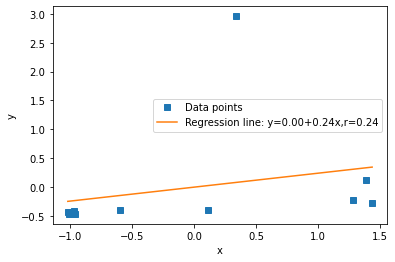

In [50]:
fig, ax=plt.subplots()
ax.plot(x,y,linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x,label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

- Từ đây có thể thấy giá trị của x càng lớn thì giá trị của y cũng càng lớn, hay giá trị biến NewCases tăng thì giá trị biến TotalCases cũng sẽ tăng

#### Mối quan hệ giữa TotalRecovered và TotalCases

In [51]:
x = new_df['TotalRecovered']
y = new_df['TotalCases']

# scipy.stats.pearsonr(x, y)
# scipy.stats.spearmanr(x, z)
scipy.stats.kendalltau(x, y) 

KendalltauResult(correlation=0.6888888888888888, pvalue=0.00468694885361552)

In [37]:
slope, intercept, r,p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x,r={r:.2f}'
line

'Regression line: y=0.00+1.00x,r=1.00'

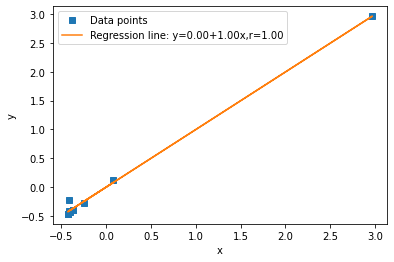

In [38]:
fig, ax=plt.subplots()
ax.plot(x,y,linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x,label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

- Giá trị biến TotalRecovered tăng thì giá trị biến TotalCases cũng sẽ tăng

#### Ta tiếp tục xét mối quan hệ giữa hai biến NewRecovered và Tests/1M pop

In [41]:
x = newcases_10_df['NewRecovered']
y = newcases_10_df['Tests/1M pop']

# scipy.stats.pearsonr(x, y)
# scipy.stats.spearmanr(x, z)
scipy.stats.kendalltau(x, y) 

KendalltauResult(correlation=-0.28888888888888886, pvalue=0.2912483465608466)

In [42]:
slope, intercept, r,p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x,r={r:.2f}'
line

'Regression line: y=423582.13+-115.84x,r=-0.37'

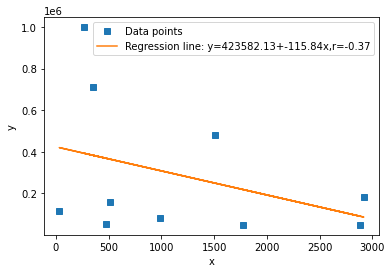

In [43]:
fig, ax=plt.subplots()
ax.plot(x,y,linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x,label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

- Từ đây ta có thể rút ra kết luận số lượng bệnh nhân phục hồi càng lớn thì số lượng test thực hiện trên 1 triệu dân sẽ càng giảm